# Allysa Webber


### Research question 1: 
#### Are there significant differences in the mean temperature, precipitation, and snowfall values in January from 2011-2023? 
### Research question 2: 
#### How do snowfall, precipitation and temperature values interact throughout the year? Are values in the winter predictive of values in the summer?
### Research question 3: 
#### How do snowfall, precipitation and temperature values interact with one another? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

## Import, clean, and save climate data to work with. 

In [15]:
#import and concat the climate files with a loop
#winter data
files= (glob('/Users/allysawebber/Documents/School/data301/project-group33/data/raw/winterdata/*'))
df_list=[]

for i in files:
    #print(i)
    df=pd.read_csv(i)
    df['year']=i[-8:-4]
    #print(df)
    df_list.append(df)
df=pd.concat(df_list)

In [12]:
#summer data
files= (glob('/Users/allysawebber/Documents/School/data301/project-group33/data/raw/summerdata/*'))
df2_list=[]

for i in files:
    #print(i)
    df2=pd.read_csv(i)
    df2['year']=i[-8:-4]
    #print(df2)
    df2_list.append(df2)
df2=pd.concat(df2_list)

In [9]:
#make sure all the years imported
df['year'].unique()
df2['year'].unique()

array(['2018', '2019', '2021', '2020', '2022', '2012', '2013', '2011',
       '2014', '2015', '2017', '2016'], dtype=object)

In [10]:
#take a look at the files
df.describe()

,Long,Lat,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,DwP,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,6624.000000,6624.000000,6097.000000,6097.000000,1582.000000,6346.000000,6346.000000,6347.000000,6347.000000,2747.000000,2747.000000,5791.000000,3779.000000,5791.000000,9.000000,9.000000,6.000000,6097.000000,6097.0
mean,-107.643054,51.527185,-5.810792,1.963097,0.907901,5.762701,1.805862,-20.796975,1.785253,31.445650,3.037131,2.872561,24.100556,9.634778,49.322222,0.333333,79.166667,692.212810,0.0
std,22.113975,5.476269,8.992165,4.773249,2.118783,6.300098,4.545104,12.836126,4.537172,40.291872,5.996424,5.933104,30.498313,6.760172,12.950944,0.500000,23.455632,286.724159,0.0
min,-140.869000,41.949000,-36.300000,0.000000,-9.000000,-31.800000,0.000000,-53.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.500000,0.000000,39.000000,12.600000,0.0
25%,-123.459000,49.025000,-10.700000,0.000000,-0.400000,3.100000,0.000000,-31.500000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,44.900000,0.000000,77.250000,451.200000,0.0
50%,-117.633000,50.099000,-4.700000,0.000000,0.900000,6.500000,0.000000,-21.600000,0.000000,20.800000,0.000000,0.000000,17.000000,9.000000,50.800000,0.000000,79.000000,669.900000,0.0
75%,-91.816000,53.295000,1.300000,1.000000,2.100000,10.100000,1.000000,-9.500000,1.000000,45.300000,3.000000,2.000000,37.000000,14.000000,56.700000,1.000000,87.500000,864.800000,0.0
max,-52.753000,82.500000,9.100000,30.000000,9.300000,30.000000,30.000000,4.900000,30.000000,473.000000,30.000000,30.000000,311.000000,31.000000,63.900000,1.000000,111.000000,1683.800000,0.0


In [16]:
####some cleaning(winter data)
#get rid of all other provinces
df= df[df['Prov_or_Ter'].str.contains('BC')]
#drop unneeded columns, rename columns, reorder rows.  
df =(df.drop(columns=['DwTm','DwP','DwTx','DwBS','DwS','DwTn','Tx','Tn','S_G','Pd','BS','HDD','CDD','P%N','BS%','S%N','D'],axis=1)
    .rename(columns={'Tm': 'Temp','S': 'Snow','P':'Precip', 'Stn_Name':'Location', 'Clim_ID':'Climate ID', 'Prov_or_Ter':'Province'})
    )
df.sort_values(by='year', ascending = True, inplace = True)

In [17]:

df =df[df['year'] != '2023']

In [13]:
####some cleaning(summer data)
#get rid of all other provinces
df2= df2[df2['Prov_or_Ter'].str.contains('BC')]
#drop unneeded columns, rename columns, reorder rows.  
df2 =(df2.drop(columns=['DwTm','DwP','DwTx','DwBS','DwS','DwTn','Tx','Tn','S_G','Pd','BS','HDD','CDD','P%N','BS%','S%N','D','S'],axis=1)
     .rename(columns={'Tm': 'Temp2','P':'Precip2', 'Stn_Name':'Location', 'Clim_ID':'Climate ID', 'Prov_or_Ter':'Province'})
     )
df2.sort_values(by='year', ascending = True, inplace = True)

In [18]:
df.head()
#looks better

,Long,Lat,Location,Climate ID,Province,Temp,Snow,Precip,year
263,-125.767,58.930,MUNCHO LAKE,1195250,BC,-13.7,64.0,72.6,2011
169,-123.093,49.171,RICHMOND NATURE PARK,1106PF7,BC,4.3,0.0,157.7,2011
170,-123.303,49.106,SANDHEADS CS,1107010,BC,5.1,NaN,NaN,2011
171,-123.122,49.295,VANCOUVER HARBOUR CS,1108446,BC,4.8,NaN,255.6,2011
172,-123.182,49.195,VANCOUVER INT'L A,1108447,BC,4.2,16.1,186.3,2011


In [19]:
#precipitation is an object currently, convert to numeric type
df['Precip']= pd.to_numeric(df['Precip'],errors='coerce')
df2['Precip2']= pd.to_numeric(df2['Precip2'],errors='coerce')

In [20]:
#make one dataframe with summer and winter data
climatedf = pd.merge(df, df2, how="outer", on=['year'])

In [21]:
climatedf = (climatedf.drop(columns=['Climate ID_y','Province_y','Long_y','Lat_y', 'Location_y','Climate ID_x'],axis=1)
             .rename(columns={'Long_x':'Longitude',"Lat_x":'Latitude','Location_x':'Location','Province_x':'Province'}))

In [22]:
climatedf.head()
#one dataframe with winter(january) and summer(July) values!

,Longitude,Latitude,Location,Province,Temp,Snow,Precip,year,Temp2,Precip2
0,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,19.2,18.8
1,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,13.1,136.1
2,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,13.8,119.0
3,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,12.8,NaN
4,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,14.2,68.4


In [ ]:
#output to processed folder
climatedf.to_csv("climatedf_allysa.csv", index=None)
df.to_csv("winterdata_allysa.csv", index=None)
df2.to_csv("summerdata_allysa.csv", index=None)

### Do the average temperature, snowfall, or precipitation values differ across January between 2011 and 2023?

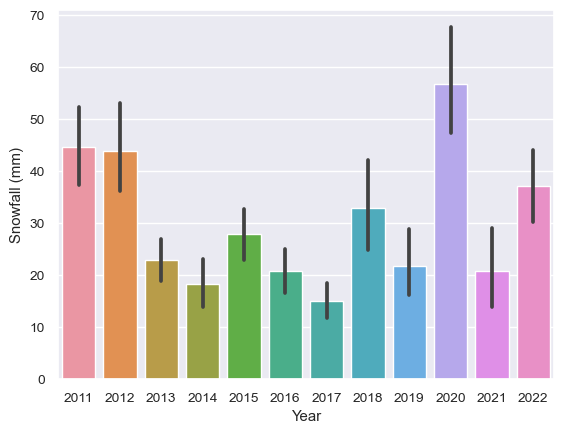

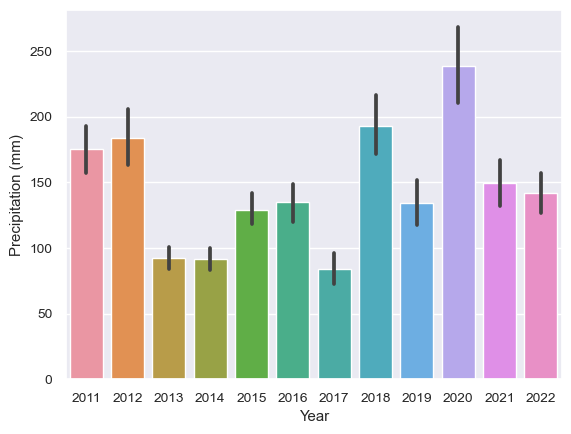

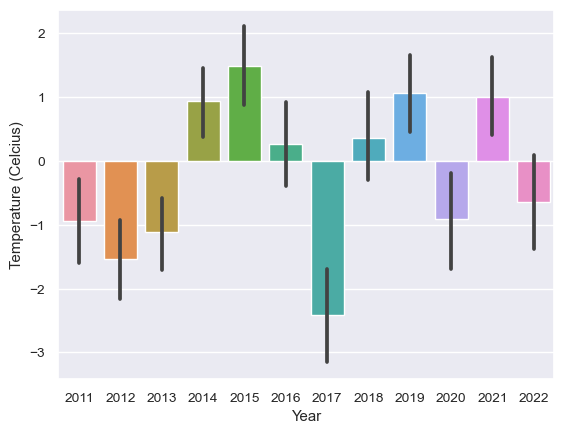

In [60]:

sns.set(font_scale=.9)
snowfall_plot = sns.barplot(y=df['Snow'],
                                      x = df['year']
                                     ).set(ylabel='Snowfall (mm)', xlabel='Year')
plt.show(snowfall_plot)
precip_plot = sns.barplot(y=df['Precip'],
                                      x = df['year']
                                 ).set(ylabel='Precipitation (mm)', xlabel='Year')
plt.show(precip_plot)
sns.set_style("whitegrid",{'axes.grid' : False})
sns.set(font_scale=.9)
temp_plot = sns.barplot(y=df['Temp'],
                                      x = df['year']
                                     ).set(ylabel='Temperature (Celcius)', xlabel='Year')
plt.show(temp_plot)



#### Visualisations of climate values in January between 2011 and 2022

/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height sma

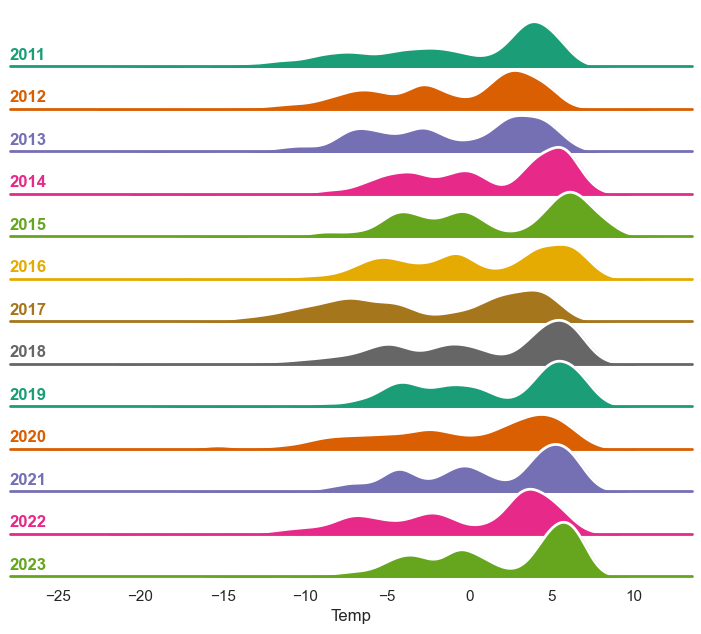

In [11]:
# try with ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Temp",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Temp", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Temp")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

#### The analysed values, temperature, precipitation, and snowfall, do not appear to have undergone a significant changes in the years shown. They do appear to fluctuate from year to year, likely due to el Nino, and la Nina patterns, and random chance. 2017 jumps out as an uncommonly cold and dry year in the output.  Overall, it is likely that a longer time frame is required to visualize significant changes in the analysed values. 

## How do snowfall, precipitation and temperature values interact throughout the year? Are values in the winter predictive of values in the summer?

In [61]:
#groupby to take mean values by each year
meantemp = df.groupby('year')['Temp'].mean()
meantemp = pd.DataFrame(meantemp)

meansnow = df.groupby('year')['Snow'].mean()
meansnow = pd.DataFrame(meansnow)

meanprecip = df.groupby('year')['Precip'].mean()
meanprecip = pd.DataFrame(meanprecip)

meanprecip2 = climatedf.groupby('year')['Precip2'].mean()
meanprecip2 = pd.DataFrame(meanprecip2)

meantemp2 = climatedf.groupby('year')['Temp2'].mean()
meantemp2 = pd.DataFrame(meantemp2)

meansdf = pd.merge(meansnow, meantemp, how="outer", on=['year'])
meansdf['Year'] = meansdf.index

newdf = pd.merge(meansdf, meanprecip, how="outer", on=['year'])
df5 = pd.merge(newdf, meanprecip2, how='outer', on=['year'])
final = pd.merge(df5, meantemp2, how='outer', on=['year'])

final
#df5 = newdf.merge(meantemp2,on='year').merge(meanprecip2,on='year')

,Snow,Temp,Year,Precip,Precip2,Temp2
year,,,,,,
2011,44.624309,-0.945935,2011,175.250612,37.555596,16.331502
2012,43.885641,-1.539552,2012,183.993561,22.002174,17.430189
2013,22.887245,-1.113688,2013,92.328519,59.965328,17.672075
2014,18.304762,0.936466,2014,91.538235,29.881784,18.172201
2015,27.992391,1.491635,2015,129.236496,66.177395,17.367063
2016,20.772515,0.265504,2016,134.873864,42.756452,17.846091
2017,15.040127,-2.406148,2017,83.755645,28.475720,18.280000
2018,32.858394,0.355752,2018,192.882589,16.674648,17.611737
2019,21.826772,1.062281,2019,134.270183,45.433654,17.350655


Text(0, 0.5, 'Summer Precipitation (mm)')

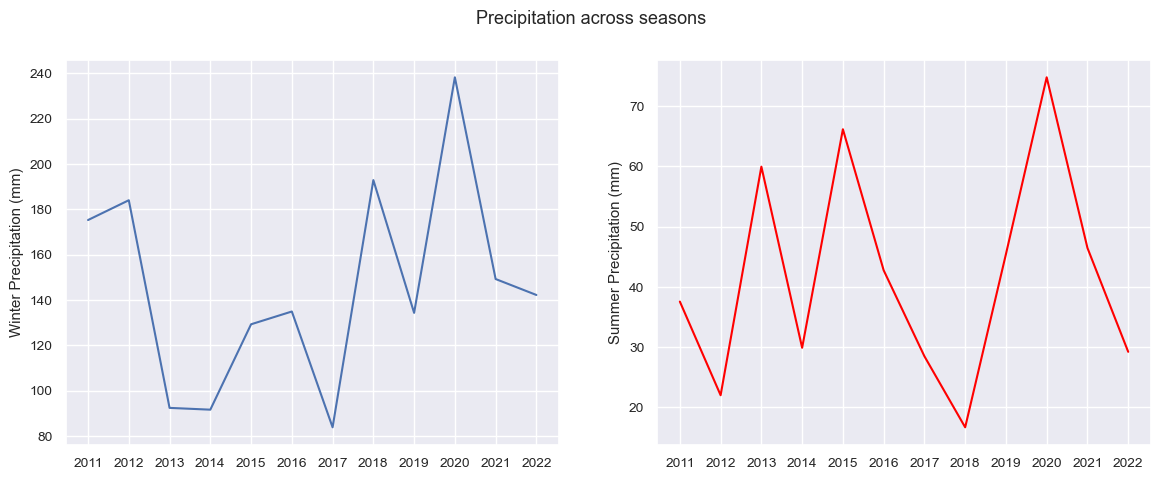

In [62]:
x = final['Year']
y = final['Precip']
z = final['Precip2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Precipitation across seasons')
ax1.plot(x,y)
ax2.plot(x,z, color='red')
ax1.set_ylabel('Winter Precipitation (mm)')
ax2.set_ylabel('Summer Precipitation (mm)')

#### Visualization of summer precipitation versus winter precipitation

Text(0, 0.5, 'Summer Temperature (Celcius)')

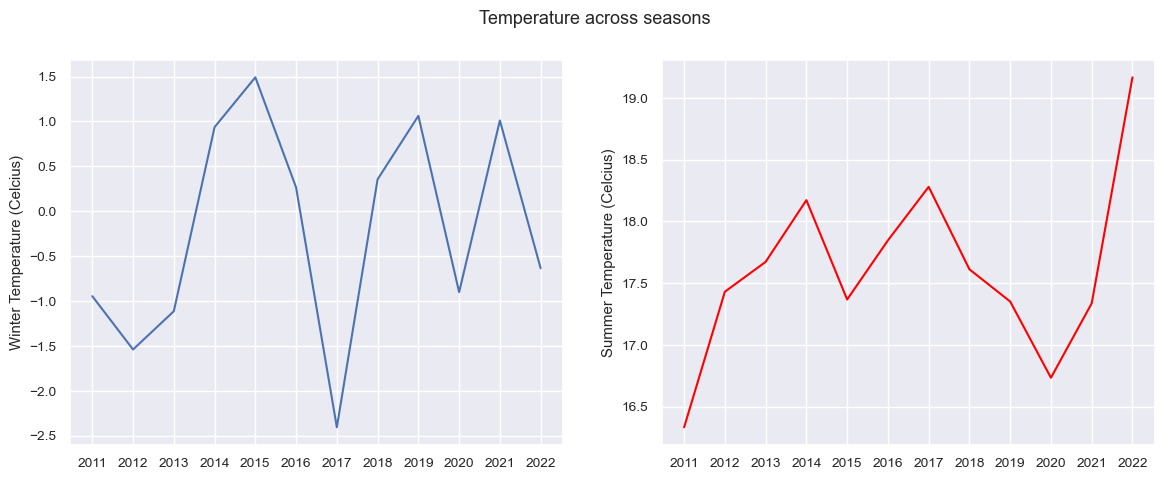

In [63]:
x = final['Year']
y = final['Temp']
z = final['Temp2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Temperature across seasons')
ax1.plot(x,y)
ax2.plot(x,z, color='red')
ax1.set_ylabel('Winter Temperature (Celcius)')
ax2.set_ylabel('Summer Temperature (Celcius)')

#### Visualization of winter temperature versus summer temperature

#### Winter and summer values of temperature appear to coinside somewhat, with a lot of peaks and lows matching within the years. There are outlier years however, where the trend is opposite. This same pattern can be seen when comparing summer and winter precipitation, with more precipitation seen in summer when precipitation values were high in winter. Overall, these trends are not strong enough to stay with any certainty that temperature or precipitaion values in winter are predictive of those in summer. Patterns would likely need to be analysed over a longer time period in order to see real patterns emerging, and to allow the detection and removal of outliers. 

## How do snowfall, precipitation and temperature values interact with one another? Is one value predictive of another?

Text(0, 0.5, 'Snowfall(mm)')

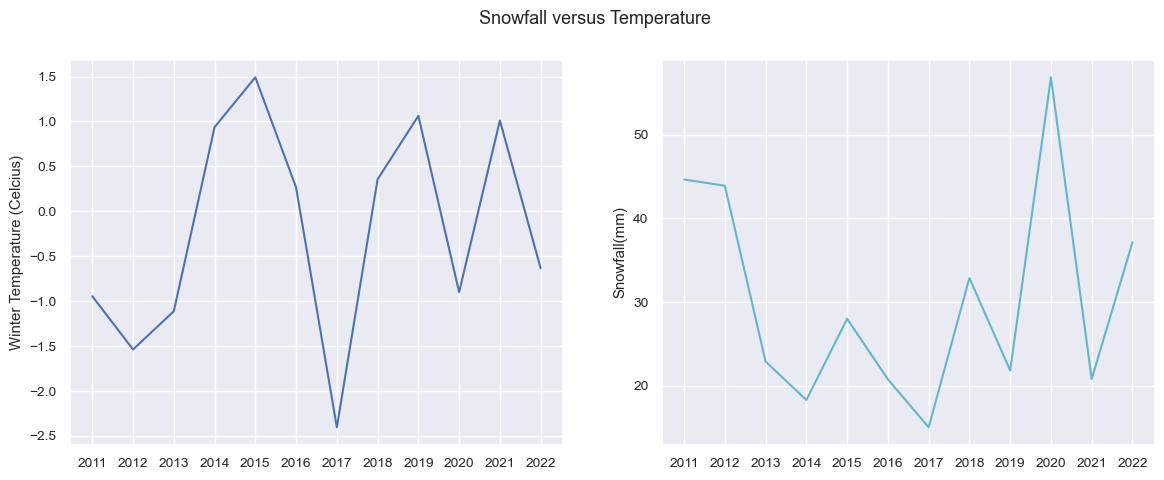

In [67]:
x = final['Year']
y = final['Temp']
z = final['Snow']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Snowfall versus Temperature')
ax1.plot(x,y)
ax2.plot(x,z, color='c')
ax1.set_ylabel('Winter Temperature (Celcius)')
ax2.set_ylabel('Snowfall(mm)')

#### Visualization of snowfall verus temperature values in January

Text(0, 0.5, 'Winter Precipitation (mm)')

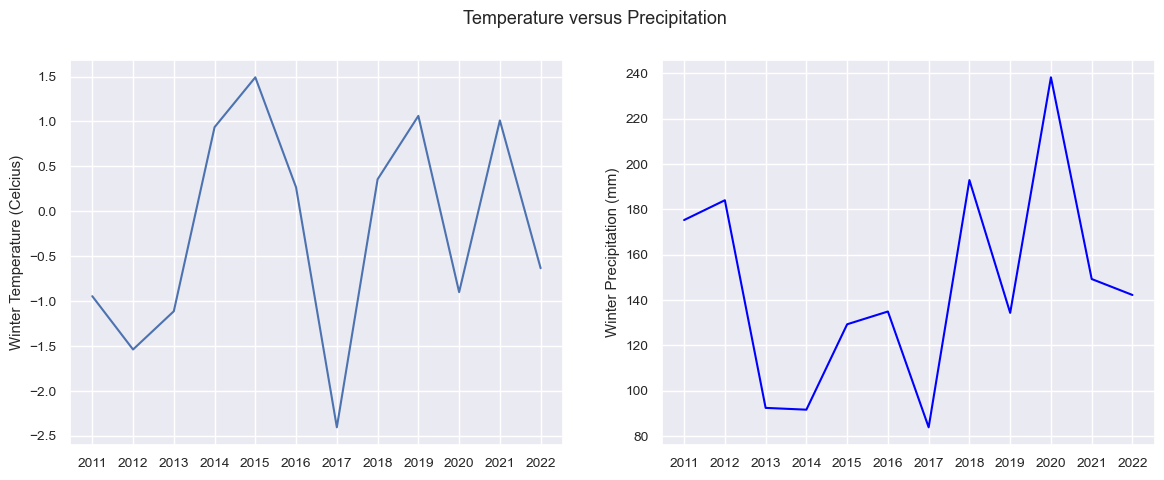

In [69]:
x = final['Year']
y = final['Temp']
z = final['Precip']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Temperature versus Precipitation')
ax1.plot(x,y)
ax2.plot(x,z, color='blue')
ax1.set_ylabel('Winter Temperature (Celcius)')
ax2.set_ylabel('Winter Precipitation (mm)')

#### Visualization of Temperature versus precipitation in January

Text(0, 0.5, 'Winter Precipitation (mm)')

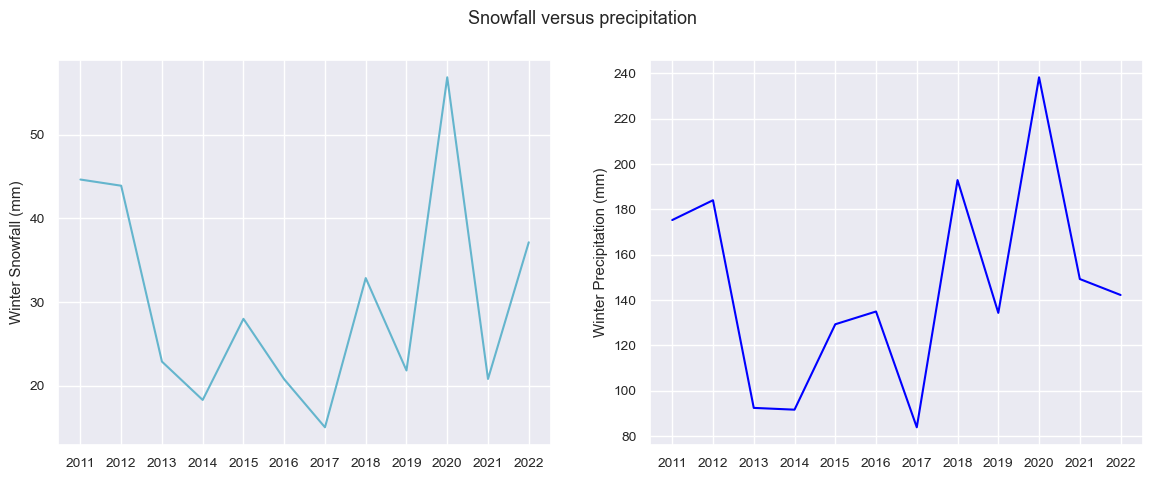

In [71]:
x = final['Year']
y = final['Snow']
z = final['Precip']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Snowfall versus precipitation')
ax1.plot(x,y, color='c')
ax2.plot(x,z, color='blue')
ax1.set_ylabel('Winter Snowfall (mm)')
ax2.set_ylabel('Winter Precipitation (mm)')

#### Visualisation of Snowfall versus precipitation in January

#### Temperature values within January appears to have a complex relationship with snowfall in Janurary. From 2011 until 2018, lower temperature seem to coinside with lesser snowfall. This relationship reverses after 2018 wherein higher temperature are coinsiding with lesser snowfall. Temperature values tended to vary similarily against precipitation, with lower temperatures coinsiding with lower precipitation up until 2018, and the pattern reversing after that. There are a few outlier years however where this pattern does not hold true. Lastly, snowfall and precipitation values tend to mirror eachother in their values, as years with high snowfall also have high precipitation, and vice versa. While some patterns are visible in the data, these trends are not strong enough to make real conclusions about the weather patterns here. More data would need to be analysed in order to detect stronger patterns, if they do exist. 